In [4]:
import torch
import numpy as np
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import Subset
from torch.utils.data import Dataset
import torchvision.transforms as transforms
import torchvision
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import numpy as np
from sklearn.model_selection import train_test_split
from metrics import ssim, calc_ssim, _psnr, calc_psnr
from utils import display_tensor
from datasets import TrainDatasetH5, EvalDatasetH5, BSD100
from models import SRCNN, VDSR
from transformations import SIMPLE_TRANSFORM, MINIMALIST_TRANSFORM
from utils import set_all_seeds, AverageMeter
from metrics import _psnr, _ssim, calc_ssim, calc_psnr



In [13]:
def get_pictures(dataset=None, weights=None):
    SEED = 0
    CHANNELS = 3
    DEVICE = torch.device('cuda:4' if torch.cuda.is_available() else 'cpu')
    print(DEVICE)

    torch.manual_seed(SEED)
    np.random.seed(SEED)

    link = '/Users/luisaneubauer/Documents/WS 2021:22/3D Reconstruction/super_resolution/data_SR/BSD100/image_SRF_3'

    #link_folder_name = 'image_SRF_3'
    #link = os.path.abspath(os.path.join(__file__, f'../data_SR/BSD100/{link_folder_name}'))
    dataset = BSD100(root_dir=link, transform=None)
    BSD100_dataset = BSD100(link)
    print(len(BSD100_dataset))

    lr_image, hr_image = BSD100_dataset.__getitem__(6)

    """Load Model:"""
    model = SRCNN(num_channels=CHANNELS).to(DEVICE).double()
    #model = VDSR(num_channels=CHANNELS, d=5).to(DEVICE).double()
    PATH = 'outputs/SRCNN-BSD100-X3/best.pth'
    model.load_state_dict(torch.load(PATH, map_location=torch.device('cpu')))
    model.eval()

    input = torch.from_numpy(lr_image).unsqueeze(0).double().permute(0,3,2,1)
    print(input.shape)
    pred = model(input)
    print(pred.shape)

    plt.figure(figsize = (10,10))
    plt.imshow(lr_image.squeeze(), cmap = 'gray')
    plt.show()

    plt.figure(figsize=(10, 10))
    plt.imshow(hr_image.squeeze(), cmap = 'gray')
    plt.title('HR Image')
    plt.show()

    pred = (pred - torch.min(pred)) /(torch.max(pred)-torch.min(pred))
    plt.figure(figsize=(10, 10))
    display_tensor(pred)

cpu
100
torch.Size([1, 3, 160, 107])
torch.Size([1, 3, 160, 107])


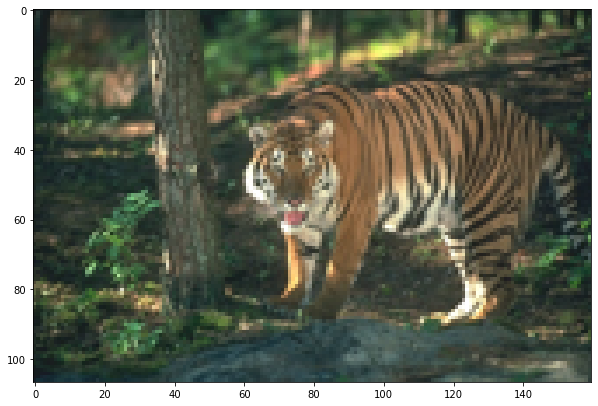

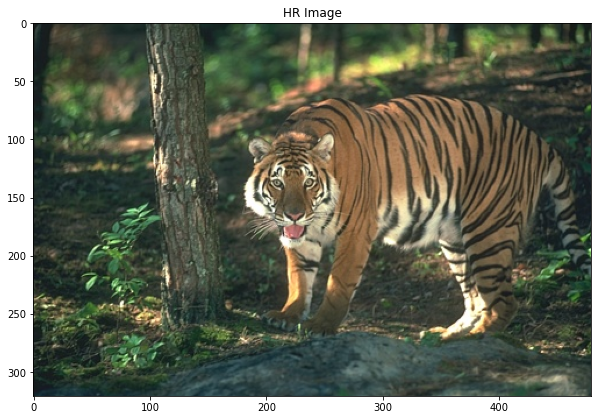

tensor(1.3331, dtype=torch.float64, grad_fn=<MaxBackward1>)
tensor(-0.1062, dtype=torch.float64, grad_fn=<MinBackward1>)


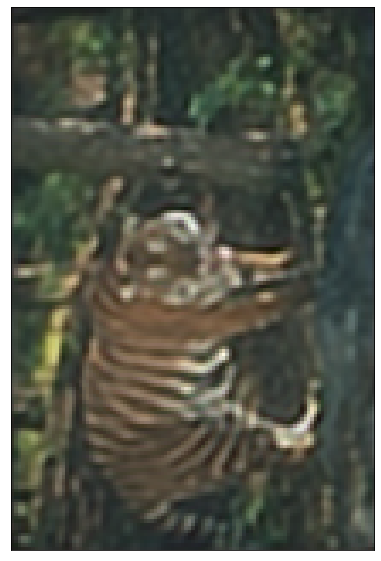

In [14]:
get_pictures()